In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [29]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


Error score of training dataset 0.6813394128565424
coffecient [[0.20119124]]
Intercept [0.60051489]
Error score of testing dataset 0.9265616592526871


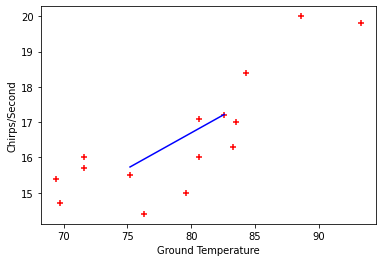

In [30]:
# with splitting the data with training and testing
# Load the data
temp=df.drop("Chirps/Second", axis='columns')
chirps=df["Chirps/Second"]

# split the data for training and testing
temp_train,temp_test,chirps_train,chirps_test = train_test_split(temp,chirps,test_size=0.2,random_state=2)

#print(temp_train.shape,chirps_train.shape,temp_test.shape,chirps_test.shape)
xtrain=temp_train.values.reshape(-1,1)
ytrain=chirps_train.values.reshape(-1,1)
xtest=temp_test.values.reshape(-1,1)
ytest=chirps_test.values.reshape(-1,1)

# Model Fitting
lr=LinearRegression()
lr.fit(xtrain,ytrain)
Y_pred_train=lr.predict(xtrain)

#print(Y_pred_train)
er_scr=metrics.r2_score(ytrain,Y_pred_train)
print("Error score of training dataset", er_scr)
test_pred=lr.predict(xtest)

## 1.Find the linear regression equation for this data.
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
Yeq=(xtest*lr.coef_)+lr.intercept_
#print(Yeq)


## 3.Find the equation's  𝑅2  
er_scr_test=metrics.r2_score(ytest,test_pred)
print("Error score of testing dataset",er_scr_test)

lr.diff = pd.DataFrame({'Actual value': ytest.flatten(), 'Predicted value': test_pred.flatten()})
#lr.diff.head()

## 2.Chart the original data and the equation on the chart.
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.scatter(temp,chirps,color="red",marker="+")
plt.plot(xtest,test_pred,color="blue")

In [31]:
## Without splitting the data

# Load the data
X=df.drop("Chirps/Second", axis='columns')
Y=df["Chirps/Second"]

# Model Fitting
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)

In [32]:
## 1.Find the linear regression equation for this data.
lr.diff = pd.DataFrame({'Actual value': Y, 'Predicted value':Y_pred})
print(lr.diff.head())
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
Yeq=(X*lr.coef_)+lr.intercept_

   Actual value  Predicted value
0          20.0        18.445091
1          16.0        14.994095
2          19.8        19.399190
3          18.4        17.572192
4          17.1        16.821093
coffecient [0.20299973]
Intercept 0.45931464523595267


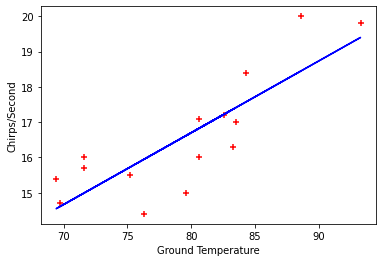

In [33]:
## 2.Chart the original data and the equation on the chart.
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.scatter(X,Y,color="red",marker="+")
plt.plot(X,Yeq,color="blue")

In [34]:
## 3.Find the equation's  𝑅2  
er_scr=metrics.r2_score(Y,Y_pred)
print("Error score =", er_scr)

Error score = 0.6922946529146998


In [35]:
## 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Yeq=(95*lr.coef_)+lr.intercept_
print(Yeq)

[19.74428913]


In [36]:
# 5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
xeq=18-lr.intercept_
xeq/lr.coef_

array([86.40743135])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## 1. Find the linear regression equation for this data for brain weight to body weight.

# with train test split

# load the dataset
brain_body= pd.read_csv("/content/brain_body.csv")
df1= pd.DataFrame(brain_body)

import math
x=np.log2(df1.brain)
y=np.log2(df1.body)

# split the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Model fitting
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
r2=lr.score(y_train,y_pred)
coeffecient=lr.coef_
inter=lr.intercept_
print(r2) 

# 3. Find the equation's  𝑅2  score
# linear regression equation
Y=(x_train*coeffecient)+inter
y_pred_test= lr.predict(x_test)

# r2 score
erscore=lr.score(y_test,y_pred_test)
print("error score=",erscore)

# 2. Chart the original data and the equation on the chart.
plt.xlabel("Brain")
plt.ylabel("Body")
plt.scatter(x,y,color="red",marker="+")
plt.plot(x_test,y_pred_test,color="blue")

In [37]:
## same dataset without splitting the data
# load the dataset
x=np.log2(df1.Brain).values.reshape(-1,1)
y=np.log2(df1.Body).values.reshape(-1,1)

# fit the model
lr=LinearRegression()
lr.fit(x,y)
Y_pred=lr.predict(x)


lr.diff = pd.DataFrame({'Actual value': y.flatten(), 'Predicted value':Y_pred.flatten()})
print(lr.diff.head())


NameError: ignored

In [ ]:
## 1. Find the linear regression equation for this data for brain weight to body weight.

# Equation of the model
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
Yeq=(x*lr.coef_)+lr.intercept_
print(Yeq)


In [ ]:
## 2. Chart the original data and the equation on the chart.
# plot the graph
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.scatter(x,y,color="red",marker="+")
plt.plot(x,Yeq,color="blue")

In [ ]:
## 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

er_scr=metrics.r2_score(y,Y_pred)
print("Error score =", er_scr)

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [38]:
df = pd.read_csv("/content/salary.csv")

In [39]:
df.head()

,Sex,Rank,Year,Degree,Ysdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [40]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
Ysdeg     0
Salary    0
dtype: int64

In [41]:
x=df.drop("Salary", axis='columns')
y=df["Salary"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [43]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
train_data_pred=mlr.predict(x_train)
from sklearn import metrics
error_score=metrics.r2_score(y_train,train_data_pred)
print(error_score)

0.8416559098711703


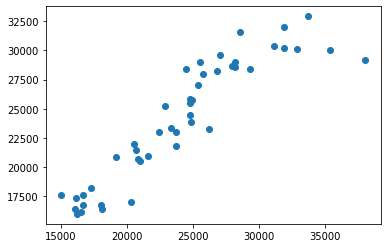

In [44]:
plt.scatter(y_train,train_data_pred)

In [45]:
y_pred_mlr= mlr.predict(x_test)
y_pred_mlr

array([16893.94642979, 18844.16352035, 19016.02391215, 16893.94642979,
       17910.96727101, 33539.24216213])

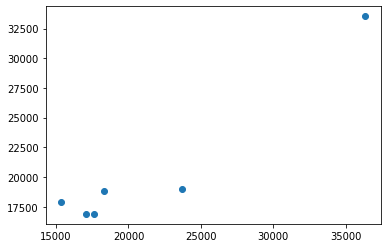

In [46]:
plt.scatter(y_test,y_pred_mlr)

In [47]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head() 

,Actual value,Predicted value
37,17095,16893.946430
36,18304,18844.163520
32,23713,19016.023912
39,17600,16893.946430
47,15350,17910.967271


In [48]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  11145.951484209074
Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('Ysdeg', -146.18425060116738)]

In [49]:
## 1. Find the linear regression equation for this data using columns 1-5 to column 6.
Y=(x_test*mlr.coef_)+mlr.intercept_

In [50]:
error_score=metrics.r2_score(y_test,y_pred_mlr)
print(error_score)

0.8787350351714383


In [51]:
## 2.Find the selection of columns with the best  𝑅2  score.

print("Coefficients:")
list(zip(x, mlr.coef_))

## since the coeffecient value of degree and YSdeg have is negative,we can conclude that sex, Rank, Year are the best columns 

Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('Ysdeg', -146.18425060116738)]

In [52]:
## 3.Report whether sex is a factor in salary.
corr = df.corr()["Salary"].sort_values(ascending=False)[1:]
corr

# -> From the resultgiven below, the correlation value between sex and salary is -0.252782
# -> Since the corrrelation between sex and city is negative, we can conclude that sex is not a factor or a bad factor to predict the salary.  

Rank      0.867488
Year      0.700669
Ysdeg     0.674854
Degree   -0.069726
Sex      -0.252782
Name: Salary, dtype: float64